In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Dropout
from keras import regularizers

import warnings
warnings.filterwarnings('ignore') 

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv('Heart.csv')

In [7]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


# Attribute Information:

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


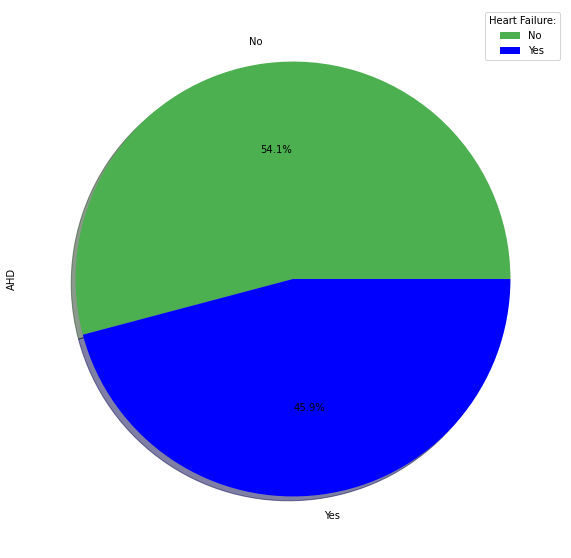

In [10]:
plt.figure(1, figsize=(10,10))
df['AHD'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "#4CAF50", "blue"),labels = df['AHD'].unique(), shadow = True)
plt.legend(title = "Heart Failure:")
plt.show()

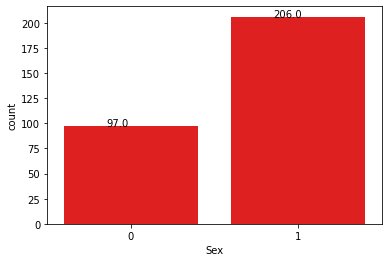

In [11]:
ax = sns.countplot(x="Sex", data=df,color='red')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

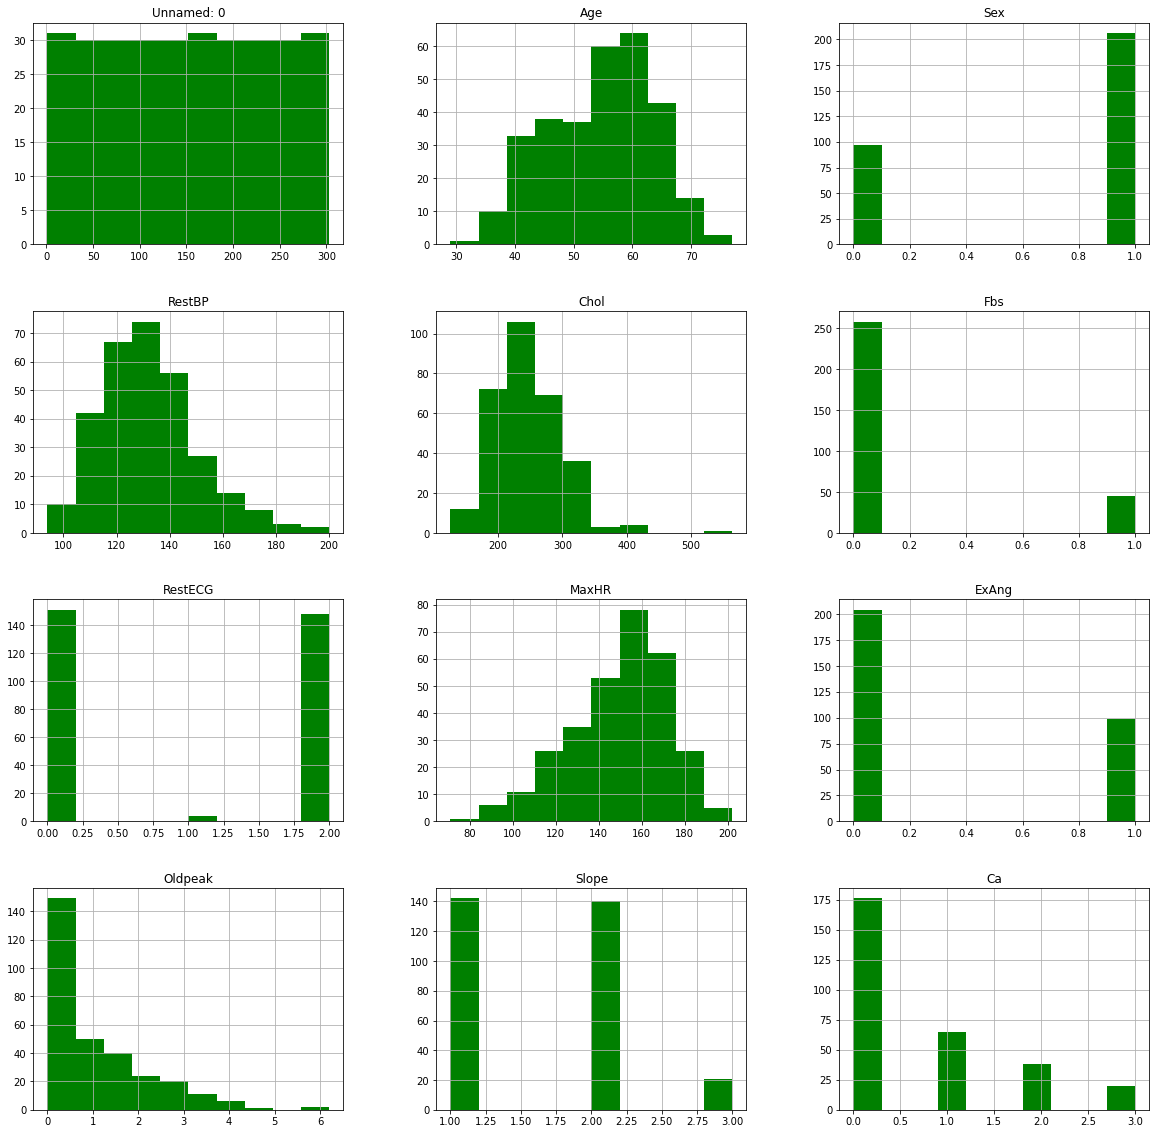

In [12]:
# plot histograms for each numerical variable
df.hist(figsize = (20, 20),color='green')
plt.show()

In [13]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

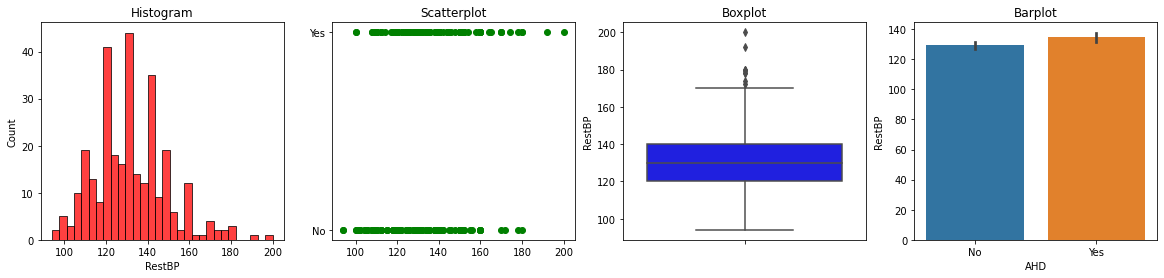

In [16]:
diagnostic_plots(df,'RestBP','AHD')

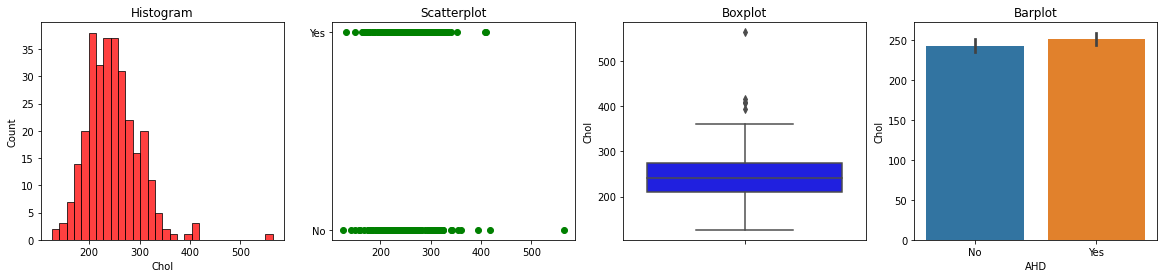

In [18]:
diagnostic_plots(df,'Chol','AHD')

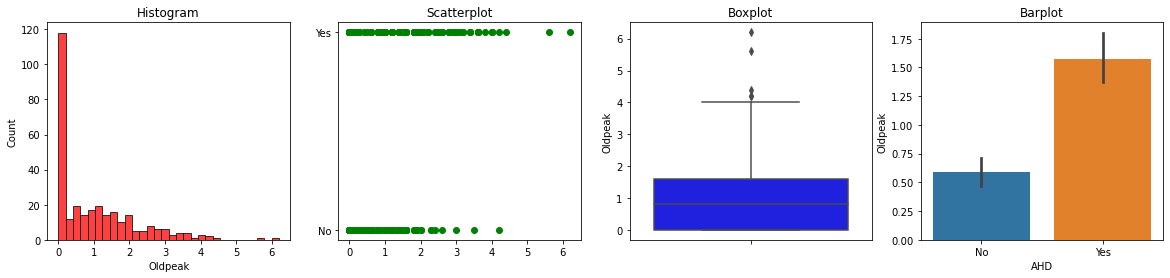

In [19]:
diagnostic_plots(df,'Oldpeak','AHD')

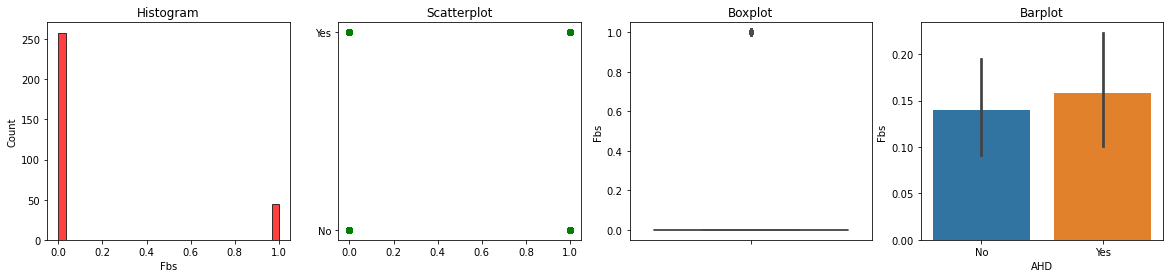

In [20]:
diagnostic_plots(df,'Fbs','AHD')

In [22]:
# We have only 0's and 1's in this feature.
df.Fbs.value_counts()

0    258
1     45
Name: Fbs, dtype: int64

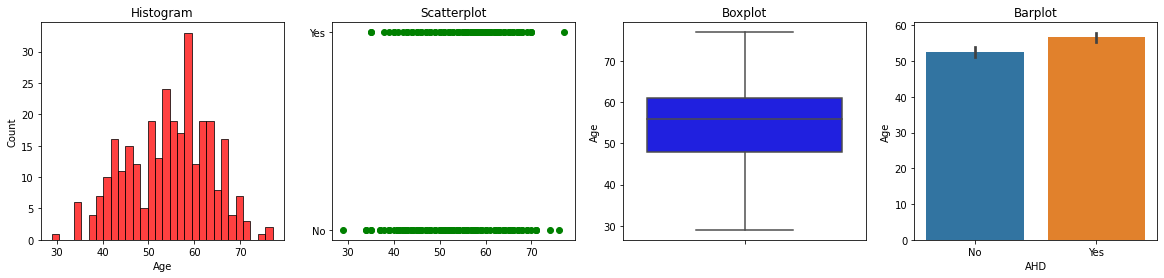

In [23]:
diagnostic_plots(df,'Age','AHD')

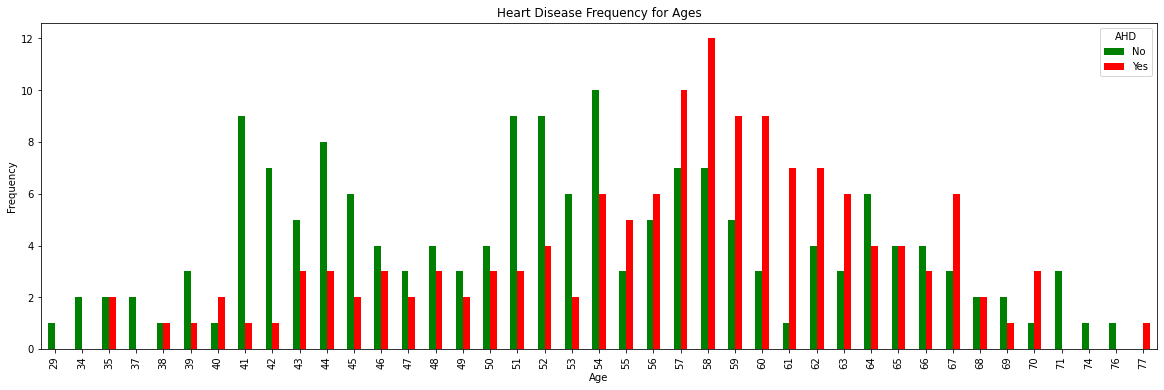

In [25]:
pd.crosstab(df.Age,df.AHD).plot(kind="bar",figsize=(20,6),color= ['green','red'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

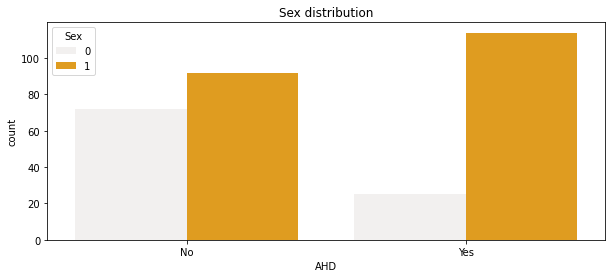

In [27]:
plt.figure(figsize=(10,4))
g = sns.countplot(data=df, x='AHD', hue='Sex',color='orange')
plt.title('Sex distribution')
plt.show()

In [28]:
def detect_outliers(df,features):
    df_copy = df.drop(df[(df[features] == 0)].index)
    # 1st quartile
    q1 = df_copy[features].quantile(0.25)
    # 3rd quartile
    q3 = df_copy[features].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    outlier_list_col = df_copy[(df_copy[features] >= Upper_tail) | (df_copy[features] <= Lower_tail)]  # | means "or"
    return pd.DataFrame(outlier_list_col)

In [29]:
RestingBP_outlier = detect_outliers(df,'RestBP')
RestingBP_outlier.value_counts(RestingBP_outlier['AHD'])

AHD
Yes    9
No     4
dtype: int64

In [30]:
Cholesterol_outlier = detect_outliers(df,'Chol')
Cholesterol_outlier.value_counts(Cholesterol_outlier['AHD'])

AHD
No     3
Yes    2
dtype: int64

In [31]:
imputer = SimpleImputer(strategy='median')

# We fit the imputer to the train set.
# The imputer will learn the median of all variables.
cols_to_use = ['Chol','RestBP']
imputer.fit(df[cols_to_use])

SimpleImputer(strategy='median')

In [32]:
df[cols_to_use] = imputer.transform(df[cols_to_use])

In [33]:
df.ChestPain.value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [34]:
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [35]:
df['AgeGroup']= np.nan
df.loc[(df['Age']>=28) & (df['Age']<35),'AgeGroup']='Young Adult' 
df.loc[(df['Age']>=35) & (df['Age']<=64),'AgeGroup']='Adult'
df.loc[df['Age']>64,'AgeGroup']='Seniors'

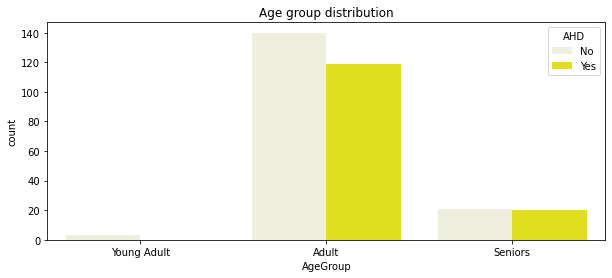

In [36]:
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='AgeGroup', hue='AHD', order=['Young Adult','Adult','Seniors'],color='yellow')
plt.title('Age group distribution')
plt.show()

In [37]:
df.drop(['Age'], axis=1, inplace=True)

In [44]:
catcols = ['Sex', 'ChestPain','Fbs','RestECG',
            'ExAng','Slope','AgeGroup']

In [45]:
def Label_Encoding(df,feature):
    label_encoder = LabelEncoder()
    df[feature]= label_encoder.fit_transform(df[feature])

In [46]:
for i in catcols:
    Label_Encoding(df,i)

In [47]:
df.head()

,Unnamed: 0,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AgeGroup
0,1,1,3,145.0,233.0,1,2,150,0,2.3,2,0.0,fixed,No,0
1,2,1,0,160.0,286.0,0,2,108,1,1.5,1,3.0,normal,Yes,1
2,3,1,0,120.0,229.0,0,2,129,1,2.6,1,2.0,reversable,Yes,1
3,4,1,1,130.0,250.0,0,0,187,0,3.5,2,0.0,normal,No,0
4,5,0,2,130.0,204.0,0,2,172,0,1.4,0,0.0,normal,No,0


In [48]:
numcols  = ['RestBP','Chol','MaxHR']

In [49]:
scaler = StandardScaler()

# Scale data
df[numcols] = scaler.fit_transform(df[numcols])

In [50]:
df.head()

,Unnamed: 0,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AgeGroup
0,1,1,3,0.757525,-0.264900,1,2,0.017197,0,2.3,2,0.0,fixed,No,0
1,2,1,0,1.611220,0.760415,0,2,-1.821905,1,1.5,1,3.0,normal,Yes,1
2,3,1,0,-0.665300,-0.342283,0,2,-0.902354,1,2.6,1,2.0,reversable,Yes,1
3,4,1,1,-0.096170,0.063974,0,0,1.637359,0,3.5,2,0.0,normal,No,0
4,5,0,2,-0.096170,-0.825922,0,2,0.980537,0,1.4,0,0.0,normal,No,0
